In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/home/indepay/Videos/ipl/matches.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 94.4+ KB


In [3]:
data['city'].fillna('Dubai',inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               636 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 94.4+ KB


In [28]:
data['team2'] = data['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['team1'] = data['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
data['winner'] = data['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [29]:
total_matches = data['team2'].value_counts() + data['team1'].value_counts()

In [30]:
data['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

<Figure size 432x288 with 0 Axes>

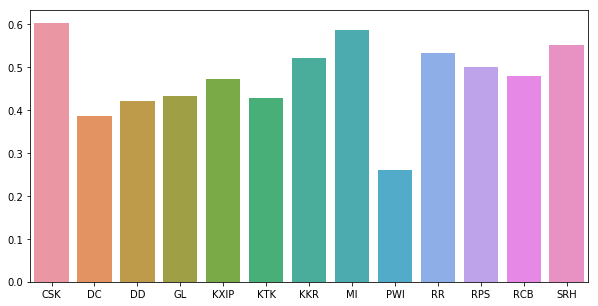

In [51]:
win_percent = (data['winner'].value_counts())/total_matches
new_index = ['CSK','DC','DD','GL','KXIP','KTK','KKR','MI','PWI','RR','RPS','RCB','SRH']
win_percent.index = new_index
plt.figure(1)
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.barplot(x=win_percent.index,y=win_percent.values)

In [56]:
data['player_of_match'].value_counts()

CH Gayle           18
YK Pathan          16
DA Warner          15
AB de Villiers     15
RG Sharma          14
SK Raina           14
G Gambhir          13
MS Dhoni           13
MEK Hussey         12
AM Rahane          12
V Sehwag           11
V Kohli            11
DR Smith           11
JH Kallis          10
SR Watson          10
KA Pollard          9
SE Marsh            9
A Mishra            9
SR Tendulkar        8
AT Rayudu           7
RV Uthappa          7
AC Gilchrist        7
RA Jadeja           7
Harbhajan Singh     6
A Nehra             6
BJ Hodge            6
SP Narine           6
M Vijay             6
AD Russell          6
UT Yadav            6
                   ..
SB Wagh             1
AD Mascarenhas      1
PP Ojha             1
CRD Fernando        1
AC Voges            1
A Singh             1
SM Katich           1
HH Gibbs            1
S Sreesanth         1
AP Tare             1
Shoaib Akhtar       1
JJ Bumrah           1
S Anirudha          1
SB Jakati           1
YS Chahal 